In [0]:
!ls

sample_data


In [0]:
!wget -q https://s3.eu-central-1.amazonaws.com/meetupsocialnetwork/group_nw_.csv

In [0]:
!wget -q https://s3.eu-central-1.amazonaws.com/meetupsocialnetwork/ny_members_edgefile.csv

In [1]:
import pandas as pd
group_edges = pd.read_csv('group_nw_.csv')
group_edges.head()

,Unnamed: 0,EdgeID,group_from,group_to,weight,comm_members
0,0,0,490552,1474611,57,"[3, 1418715, 1671282, 2148610, 2319427, 270929..."
1,1,1,490552,1490492,66,"[3, 1418715, 1584644, 2148610, 2709298, 330086..."
2,2,2,490552,1515830,167,"[3, 1418715, 1597206, 1671282, 2148610, 222025..."
3,3,3,490552,1574965,46,"[3, 1418715, 1597206, 1671282, 2148610, 249616..."
4,4,4,490552,1669000,62,"[3, 1584644, 1597206, 2684823, 2741328, 318142..."


In [2]:
group_edges.filter(group_edges["weight"] >= 5)
#group_edges=group_edges.loc[group_edges['# common groups'] >1]
group_edges.head()

,Unnamed: 0,EdgeID,group_from,group_to,weight,comm_members
0,0,0,490552,1474611,57,"[3, 1418715, 1671282, 2148610, 2319427, 270929..."
1,1,1,490552,1490492,66,"[3, 1418715, 1584644, 2148610, 2709298, 330086..."
2,2,2,490552,1515830,167,"[3, 1418715, 1597206, 1671282, 2148610, 222025..."
3,3,3,490552,1574965,46,"[3, 1418715, 1597206, 1671282, 2148610, 249616..."
4,4,4,490552,1669000,62,"[3, 1584644, 1597206, 2684823, 2741328, 318142..."


In [21]:
group_edges.shape

(13079090, 6)

In [0]:
import networkx as nx

g = nx.Graph()
g = nx.from_pandas_edgelist(
			df = group_edges,
			source = 'group_from',
			target = 'group_to', 
			edge_attr = 'weight')

In [4]:
print(g.number_of_nodes())

print(g.number_of_edges())

12544
13079090


In [5]:
# Graph statistics
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 12544\nNumber of edges: 13079090\nAverage degree: 2085.3141'

500
21651
Counter({0: 137, 1: 127, 3: 127, 2: 107, 4: 1, 5: 1})


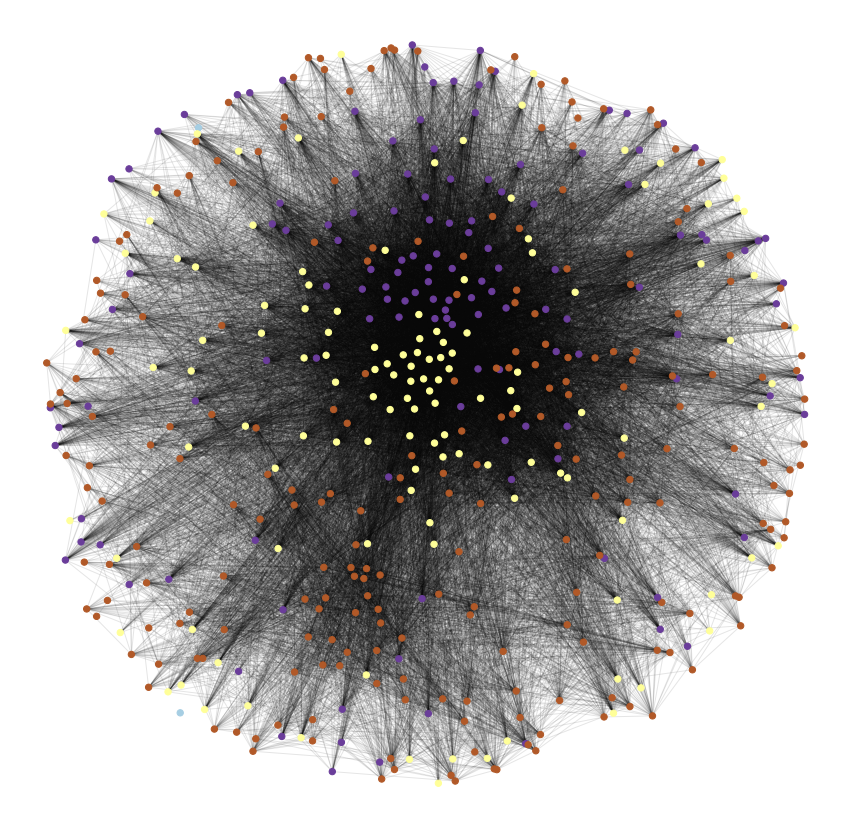

In [6]:
import networkx as nx
import community
import matplotlib.pyplot as plt
from collections import Counter
import networkx.algorithms.community 
G = nx.karate_club_graph()  # load a default graph

import random


k = 500
sampled_nodes = random.sample(g.nodes, k)
G = g.subgraph(sampled_nodes)
print(G.number_of_nodes())

print(G.number_of_edges())
partition = community.best_partition(G)  # compute communities

count= Counter(partition.values())
print(count)
values= []
for node in G.nodes():
  #print(count[partition.get(node)])
  if count[partition.get(node)] > 1: 
    values.append(partition.get(node)+14)
  else: 
    values.append(1)
  
#values = [partition.get(node) for node in G.nodes()]
pos = nx.spring_layout(G, k=2)  # compute graph layout
plt.figure(figsize=(15, 15))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=40, cmap=plt.get_cmap('Paired'), node_color=values)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.show(G)

In [0]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.plasma, 
                                   node_color=measures.values(),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [0]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

In [0]:
h=nx.make_max_clique_graph(g)

pos = nx.spring_layout(h, k=2)  # compute graph layout
plt.figure(figsize=(15, 15))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(h, pos, node_size=40)
nx.draw_networkx_edges(h, pos, alpha=0.1)
plt.show(h)

In [0]:
print(h.number_of_nodes())

print(h.number_of_edges())